# Finding the path of dataset 

# Imorting Libraries

In [1]:
import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from joblib import dump, load

# Reading the dataset

In [2]:
text = []
clas = []
#df = pd.read_csv(r"C:\Users\abhin\OneDrive\Desktop\sp jain program\sem 3\natural language and conversational systems with Business application\assessments\2\Hate Speech and Offensive Language Dataset\hate-speech-detection-using-lstm.ipynb", error_bad_lines=False)
# df = pd.read_csv(r"C:\Users\abhin\OneDrive\Desktop\sp jain program\sem 3\natural language and conversational systems with Business application\assessments\2\Hate Speech and Offensive Language Dataset\hate-speech-detection-using-lstm.ipynb", header=0, error_bad_lines=False)
df = pd.read_csv('labeled_data.csv')


In [1]:
print(df.columns)


NameError: name 'df' is not defined

In [4]:
text = df['tweet'].tolist()
clas = df['class'].tolist()

# creating a new dataframe for easy text processing

In [5]:
df = pd.DataFrame({'tweet': text, 'class': clas})

# Finding if there is any missing data

In [6]:
print(df.isnull().sum())

tweet    0
class    0
dtype: int64


In [7]:
# Displaying the class distribution
class_distribution = df['class'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
1    19190
2     4163
0     1430
Name: class, dtype: int64


C:\Users\abhin\AppData\Local\Temp\ipykernel_13752\315450826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df, palette='viridis')


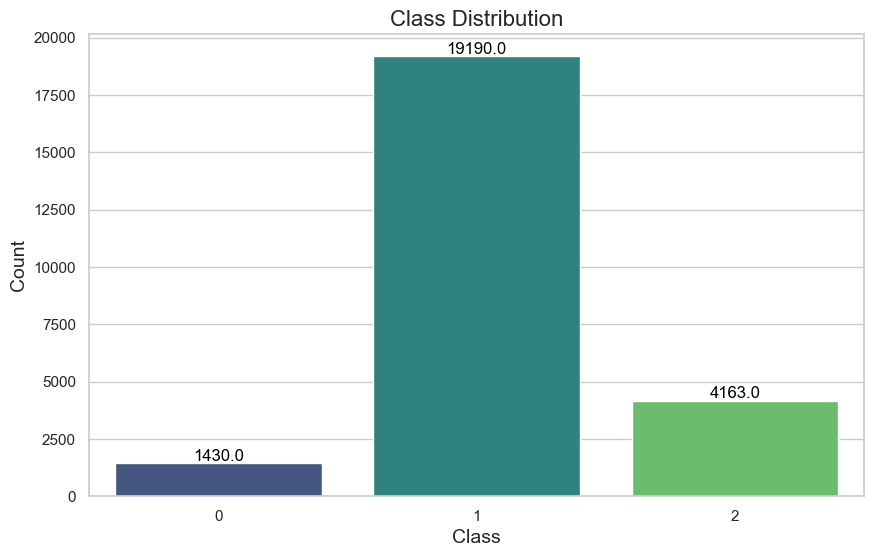

In [8]:
# Displaying the class distribution with count annotations
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='class', data=df, palette='viridis')

# Adding count annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


# Converting the data into lower case.

In [9]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

# removing punctuations

In [10]:
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:   
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

C:\Users\abhin\AppData\Local\Temp\ipykernel_13752\1376659825.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


# Removing '\n' and '\t', extra spaces, quoting text, and progressive pronouns.

In [11]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

# removing stop-words

In [12]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\abhin\AppData\Local\Temp\ipykernel_13752\1953869578.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


# Using Bag of Words approach for final data Preparation.¶

In [13]:
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

## Word Cloud

In [14]:
from wordcloud import WordCloud

# Class 0 Word Cloud
class_0_tweets = ' '.join(df[df['class'] == 0]['tweet'])
wordcloud_class_0 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(class_0_tweets)

# Class 1 Word Cloud
class_1_tweets = ' '.join(df[df['class'] == 1]['tweet'])
wordcloud_class_1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(class_1_tweets)

# Class 2 Word Cloud
class_2_tweets = ' '.join(df[df['class'] == 2]['tweet'])
wordcloud_class_2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(class_2_tweets)





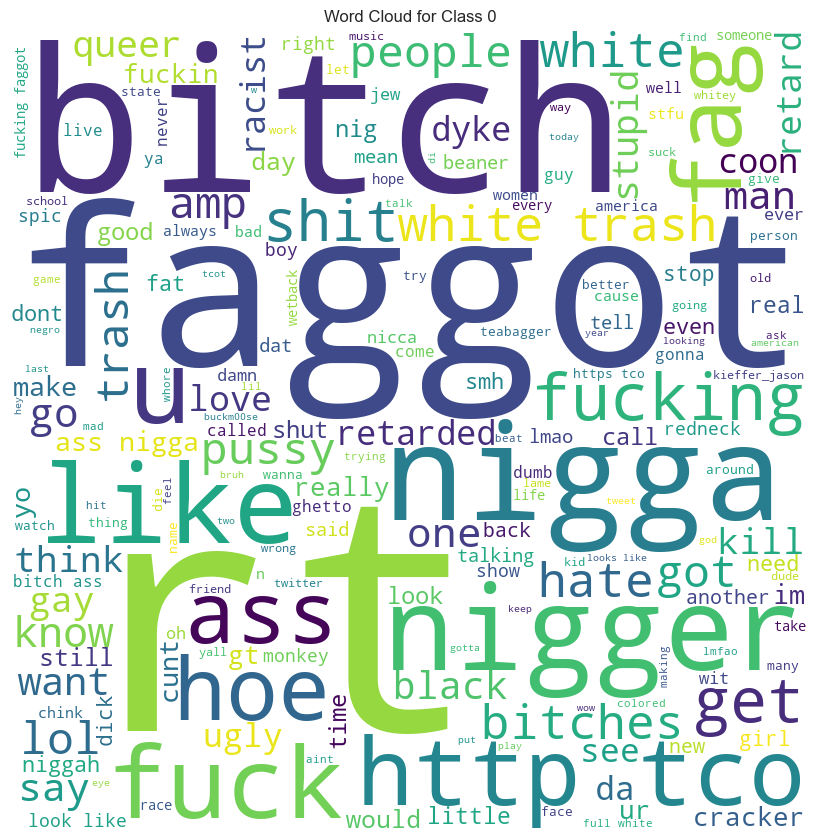

In [15]:
# Plotting the Word Clouds
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_class_0) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for Class 0')
plt.show()


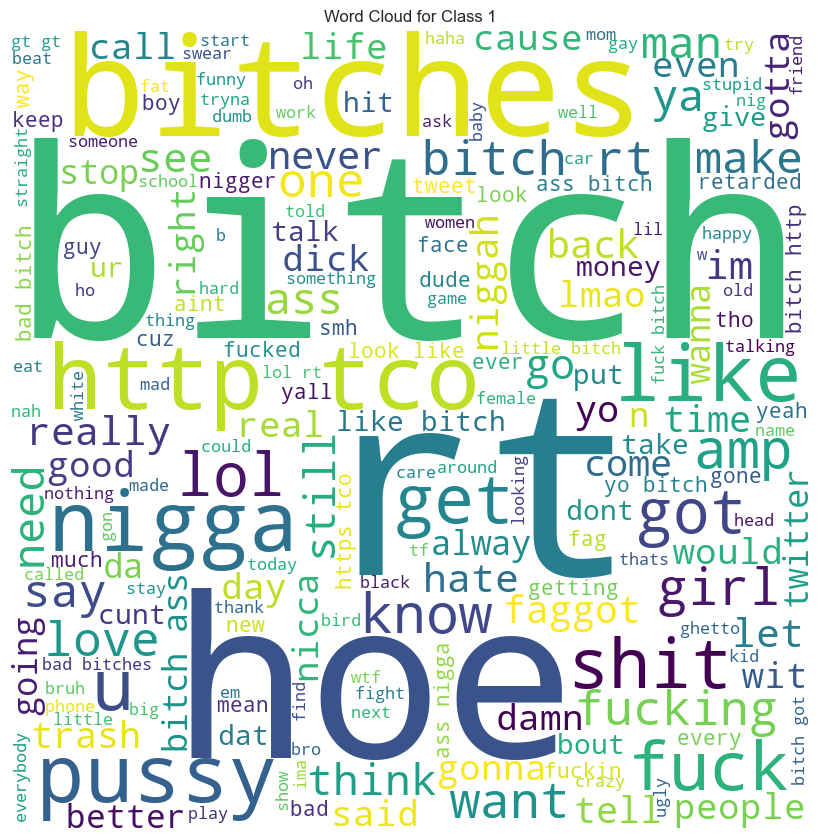

In [16]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_class_1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for Class 1')
plt.show()


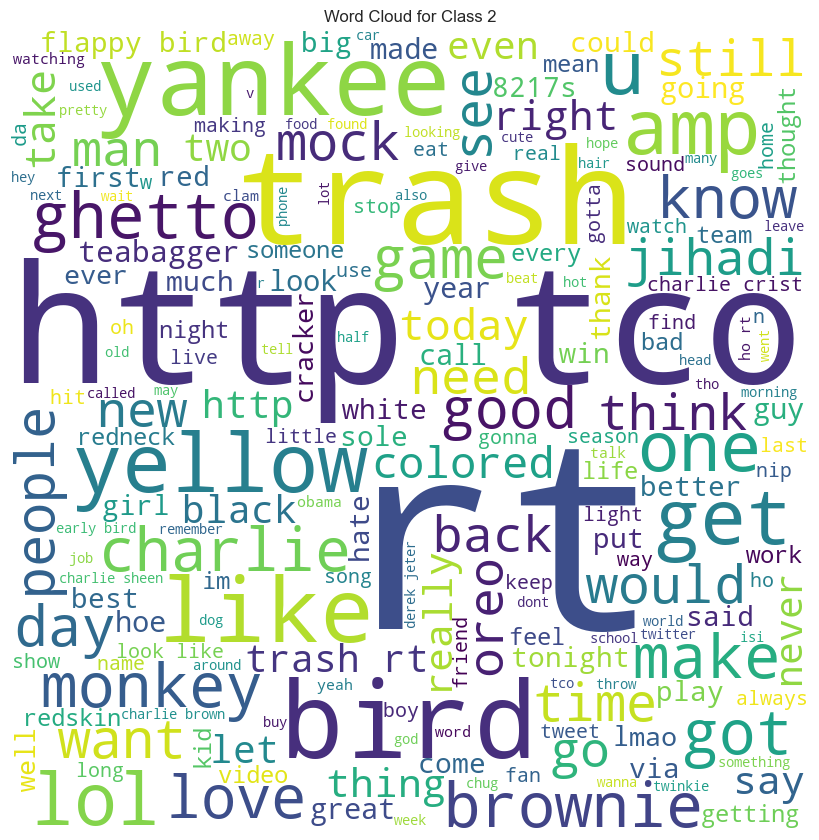

In [17]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_class_2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for Class 2')
plt.show()

# Splitting the Data using Stratified split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
# pip install imbalanced-learn==0.7.0  # Replace with the version that is known to be compatible


In [21]:
# Apply oversampling to the training set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


# Using Random Forest Classifier as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8275434243176178


['rf.joblib']

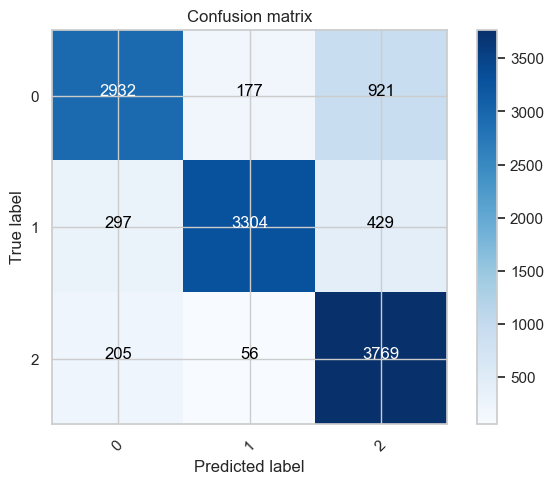

In [22]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'rf.joblib') 

# Using Decision tree as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8212572373862697


['decision.joblib']

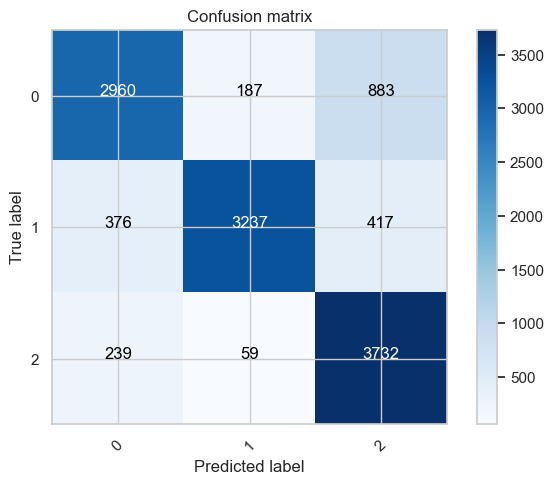

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accacy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'decision.joblib') 

# Using AdaBoost Classifier as the Model and printing evaluating it using confusion matrix

In [24]:
# clf = AdaBoostClassifier(n_estimators=100)
# clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("accuracy is: ",accuracy)
# CM = confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(CM, classes = range(3))
# dump(clf, 'ada.joblib') 

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Test Accuracy: 0.7100909842845327


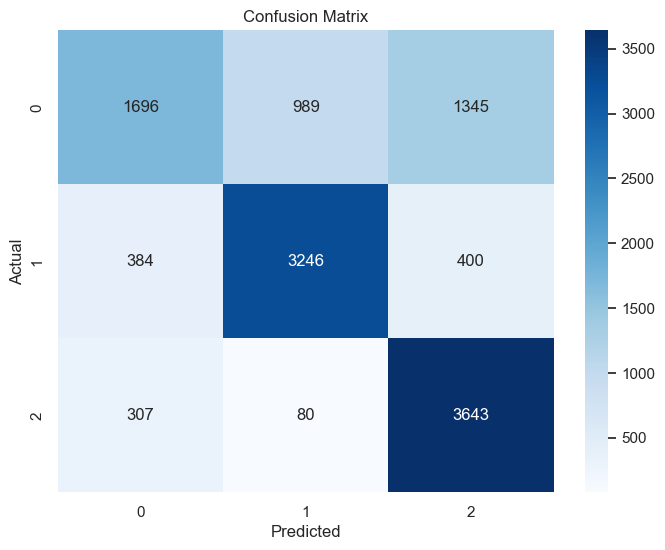

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data loaded and split into X_train, X_test, y_train, y_test

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_ada_clf = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_ada_clf.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Naive Bayes

Naive Bayes Accuracy: 0.8291862811028917
Naive Bayes Confusion Matrix:
[[  43  335   49]
 [  55 5554  138]
 [   2  691  568]]


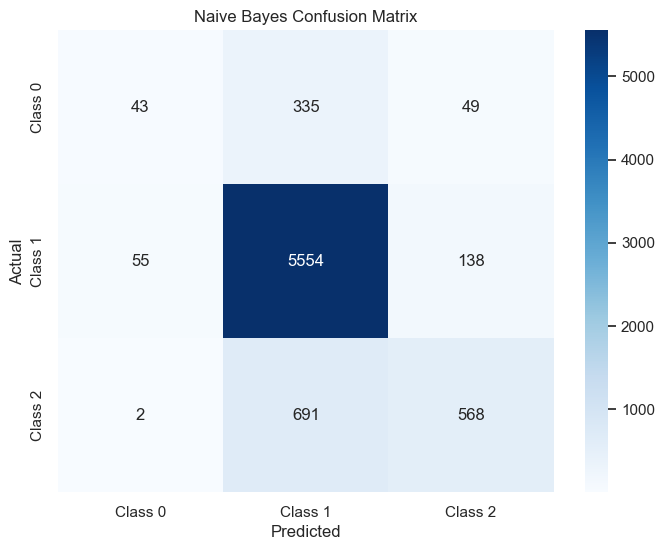

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from wordcloud import WordCloud
import numpy as np

# Assuming you have loaded your data into 'df' DataFrame

# Splitting the data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(df['tweet'], df['class'], test_size=0.3, random_state=42)

# Create a CountVectorizer and fit_transform on the training data
cv = CountVectorizer(max_features=75)
X_train_nb = cv.fit_transform(X_train_nb).toarray()

# Transform the testing data
X_test_nb = cv.transform(X_test_nb).toarray()

# Create and fit the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train_nb)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_nb)

# Evaluate the model
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Linear Regression

Accuracy: 0.8520511096166778


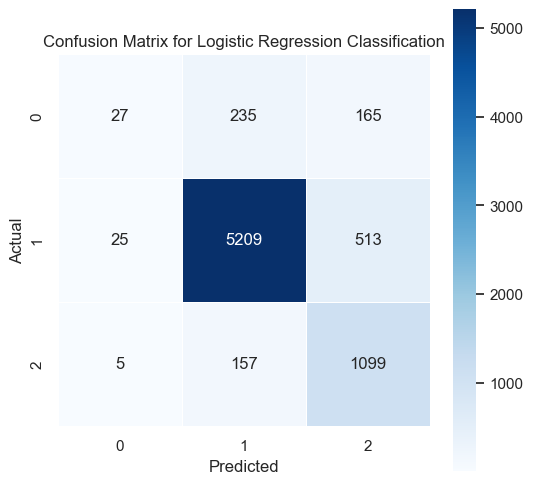

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into 'X' and 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Classification')
plt.show()


## SVM

SVM Accuracy: 0.7696032279757902
SVM Confusion Matrix:
[[ 178   72  179]
 [ 745 4362  650]
 [  49   18 1182]]


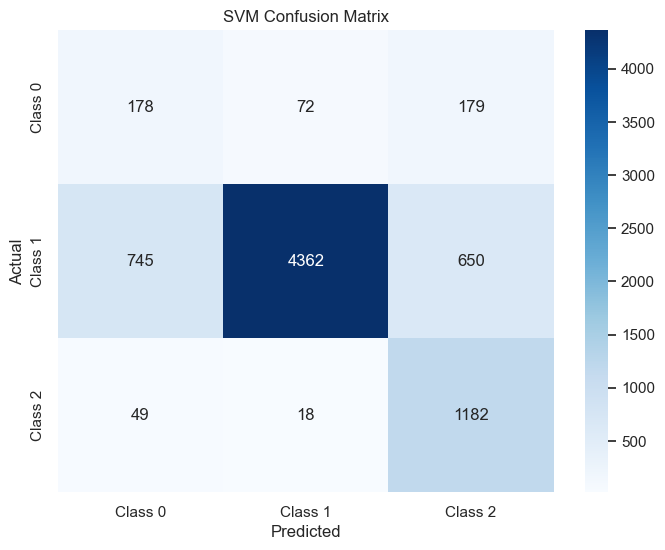

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your data into 'X' and 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply oversampling to the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Create and train the Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Converting the labels into categorical format

In [29]:
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

# Creating and Training an LSTM Model

In [30]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.optimizers import Adam

In [31]:
from keras.optimizers import Adam
from keras.layers import Bidirectional, LSTM, Dense, Embedding, SpatialDropout1D, Dropout
from keras.models import Sequential
from keras.regularizers import l2  # Add this import statement
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


# Tokenizing the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(df['tweet'])

# Convert text data to sequences
sequences = tokenizer.texts_to_sequences(df['tweet'])

# Padding sequences
max_sequence_length = 50
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = to_categorical(df['class'], num_classes=3, dtype='float32')

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# Define batch size
batch_size = 32

from keras.layers import Bidirectional, LSTM, Dense, Embedding, SpatialDropout1D, Dropout
from keras.callbacks import EarlyStopping

# Creating and Training an LSTM Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.5))  # Increased dropout
model.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5)))  # Reduced LSTM units
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Added regularization to dense layer
model.add(Dropout(0.5))  # Increased dropout in dense layer
model.add(Dense(3, activation='softmax'))

# Optimizer with learning rate scheduling
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Commented out the callback

# Training
epochs = 25  # or any other desired number of epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)



Epoch 1/25


543/543 [==============================] - 24s 37ms/step - loss: 1.0616 - accuracy: 0.7503 - val_loss: 0.8533 - val_accuracy: 0.7743
Epoch 2/25
543/543 [==============================] - 19s 36ms/step - loss: 0.8160 - accuracy: 0.7743 - val_loss: 0.7112 - val_accuracy: 0.7743
Epoch 3/25
543/543 [==============================] - 19s 36ms/step - loss: 0.6412 - accuracy: 0.7947 - val_loss: 0.5274 - val_accuracy: 0.8437
Epoch 4/25
543/543 [==============================] - 19s 35ms/step - loss: 0.5107 - accuracy: 0.8571 - val_loss: 0.4618 - val_accuracy: 0.8737
Epoch 5/25
543/543 [==============================] - 19s 35ms/step - loss: 0.4525 - accuracy: 0.8777 - val_loss: 0.4279 - val_accuracy: 0.8783
Epoch 6/25
543/543 [==============================] - 20s 36ms/step - loss: 0.4114 - accuracy: 0.8889 - val_loss: 0.4080 - val_accuracy: 0.8833
Epoch 7/25
543/543 [==============================] - 19s 35ms/step - loss: 0.3842 - accuracy: 0.8958 - val_loss: 0.3915 - val_accura

In [32]:
import pickle

# Save the tokenizer to a file
tokenizer_path = "C:/Users/abhin/OneDrive/Desktop/sp jain program/sem 3/natural language and conversational systems with Business application/assessments/2/Hate Speech and Offensive Language Dataset/tokenizer.pkl"
with open(tokenizer_path, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


233/233 [==============================] - 2s 6ms/step - loss: 0.4201 - accuracy: 0.8811
Test Loss: 0.4201
Test Accuracy: 0.8811


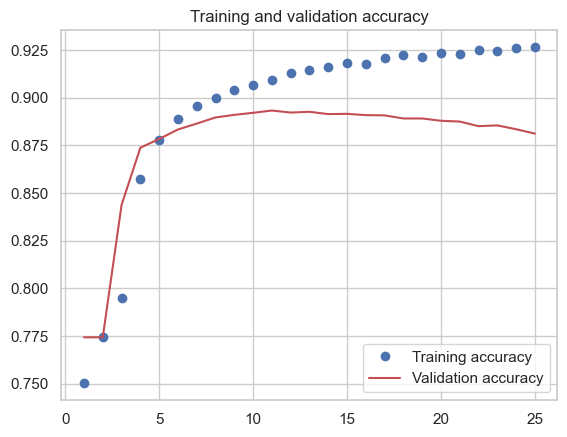

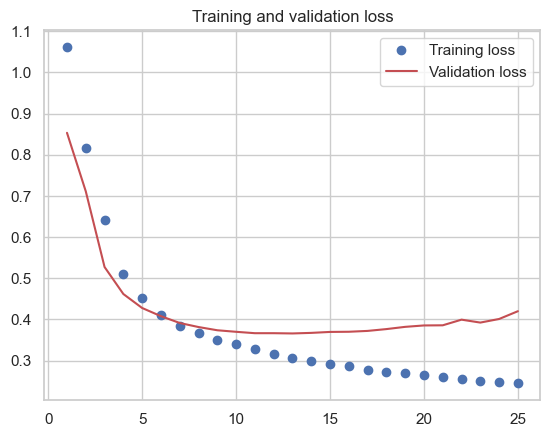

In [33]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
from tabulate import tabulate

# Extracting training and validation loss and accuracy from the history object
train_loss = history.history['loss'][-1]
train_acc = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

# Adding LSTM metrics to the summary table
metrics_lstm = pd.DataFrame({
    'Model': ['LSTM'],
    'Train Loss': [train_loss],
    'Train Accuracy': [train_acc],
    'Validation Loss': [val_loss],
    'Validation Accuracy': [val_acc]
})

# Displaying LSTM metrics
print("LSTM Metrics:")
print(tabulate(metrics_lstm, headers='keys', tablefmt='pretty', showindex=False))

# Creating an empty DataFrame for the combined summary table
accuracy_summary = pd.DataFrame()

# Adding LSTM metrics to the combined summary table
accuracy_summary = accuracy_summary.append(metrics_lstm, ignore_index=True)


LSTM Metrics:
+-------+--------------------+--------------------+---------------------+---------------------+
| Model |     Train Loss     |   Train Accuracy   |   Validation Loss   | Validation Accuracy |
+-------+--------------------+--------------------+---------------------+---------------------+
| LSTM  | 0.2457510381937027 | 0.9265044927597046 | 0.42008939385414124 | 0.8811029195785522  |
+-------+--------------------+--------------------+---------------------+---------------------+


C:\Users\abhin\AppData\Local\Temp\ipykernel_13752\2686985284.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_summary = accuracy_summary.append(metrics_lstm, ignore_index=True)


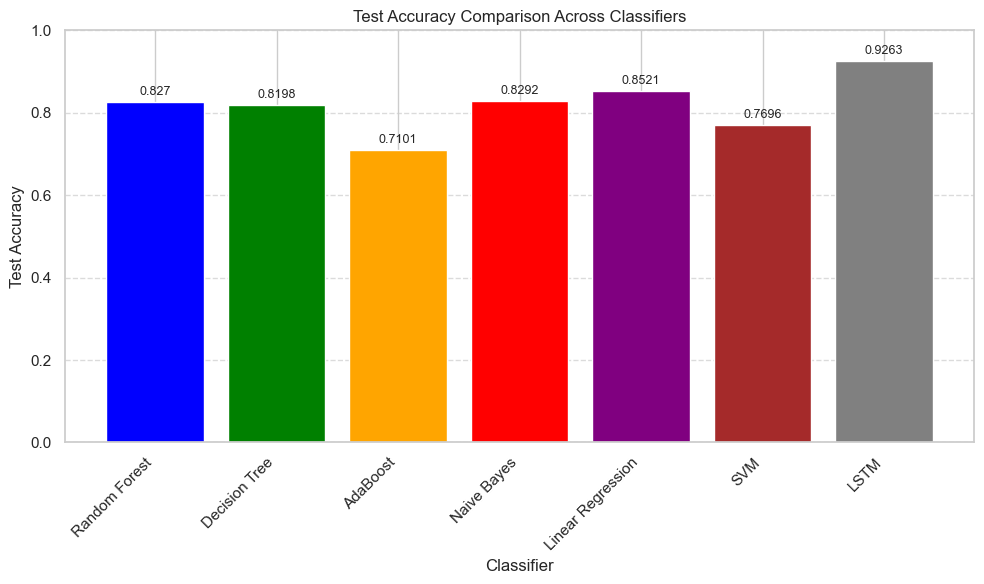

In [35]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have computed test accuracies for each classifier
test_accuracy_rf = 0.8269644334160463
test_accuracy_dt = 0.8197684036393714
test_accuracy_ada = 0.7100909842845327
test_accuracy_nb = 0.8291862811028917
test_accuracy_reg = 0.8520511096166778
test_accuracy_svm = 0.7696032279757902
test_accuracy_lstm = 0.9263

# Create a list of test accuracies and classifier names
test_accuracies = [test_accuracy_rf, test_accuracy_dt, test_accuracy_ada, test_accuracy_nb, test_accuracy_reg, test_accuracy_svm, test_accuracy_lstm]
classifiers = ['Random Forest', 'Decision Tree', 'AdaBoost', 'Naive Bayes', 'Linear Regression', 'SVM', 'LSTM']

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(classifiers, test_accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'gray'])

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, test_accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(accuracy, 4), ha='center', va='bottom', fontsize=9)

# Enhancements to the plot
plt.title('Test Accuracy Comparison Across Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Saving the LSTM Model

In [36]:
model.save('lstm.keras')
